In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('train (2).csv')

In [4]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
df.shape

(4250, 20)

In [6]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [7]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
df['churn'].replace({'no': 0, 'yes': 1}, inplace=True)
df['international_plan'].replace({'no': 0, 'yes': 1}, inplace=True)
df['voice_mail_plan'].replace({'no': 0, 'yes': 1}, inplace=True)
df.drop(columns=['state', 'area_code'], inplace=True)

df['minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['calls_cnt'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

df.drop(columns=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)
df.drop(columns=['total_day_calls', 'total_eve_calls', 'total_night_calls'], inplace=True)
df.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge'], inplace=True)
df.drop(columns=['total_intl_minutes', 'total_intl_calls'], inplace=True)

df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_charge,number_customer_service_calls,churn,minutes,calls_cnt,total_charge
0,107,0,1,26,3.70,1,0,611.5,329,55.54
1,137,0,0,0,3.29,0,0,527.2,328,59.00
2,84,1,0,0,1.78,2,0,558.2,248,65.02
3,75,1,0,0,2.73,3,0,501.9,356,49.36
4,121,0,1,24,2.03,3,0,779.3,314,76.28


In [9]:
df.isnull().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
minutes                          0
calls_cnt                        0
total_charge                     0
dtype: int64

In [10]:
df=df.fillna(df.mean())

In [11]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_charge,number_customer_service_calls,churn,minutes,calls_cnt,total_charge
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,2.769654,1.559059,0.140706,580.961388,299.923294,56.683586
std,39.698401,0.290714,0.439583,13.439882,0.745204,1.311434,0.347759,88.823648,34.405153,10.334156
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.200000,188.000000,19.980000
25%,73.000000,0.000000,0.000000,0.000000,2.300000,1.000000,0.000000,521.125000,277.000000,49.592500
50%,100.000000,0.000000,0.000000,0.000000,2.780000,1.000000,0.000000,581.400000,300.000000,56.680000
75%,127.000000,0.000000,1.000000,16.000000,3.240000,2.000000,0.000000,640.900000,323.000000,63.447500
max,243.000000,1.000000,1.000000,52.000000,5.400000,9.000000,1.000000,876.900000,410.000000,92.560000


In [12]:
X = df.drop("churn", axis=1)
y = df["churn"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

In [14]:
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate=0.01, n_estimators=400, max_depth=13),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'SVC': SVC(kernel='linear'),
    'XGBClassifier': XGBClassifier()
}

In [15]:
dict_ensemble_methods_f1= {}
dict_ensemble_methods_acc = {}
dict_ensemble_methods_model = {}

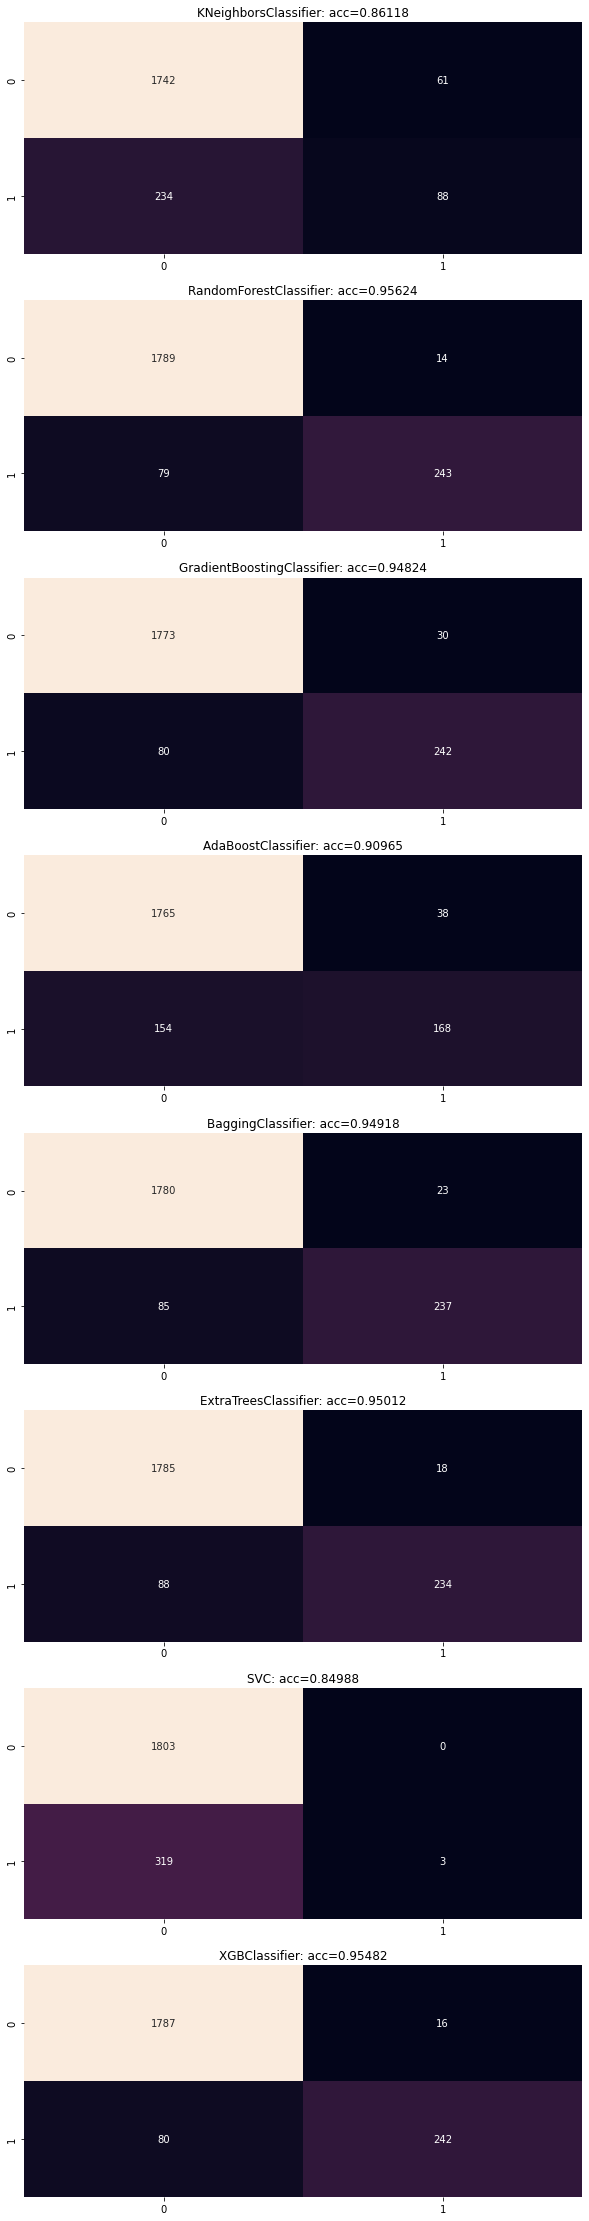

In [16]:
fig, axs = plt.subplots(len(models), 1, figsize=(10, len(models)*5))
for model_name, i in zip(models, range(len(models))):
    # Load the model obj, fit, predict and calc mse
    model = models[model_name]
    model.fit(
        X_train, 
        y_train
    )
    res=model.predict(X_test)
    f1=f1_score(y_test, res, average='micro')
    acc=accuracy_score(y_test, res)

    # Load the result into the created dict
    dict_ensemble_methods_f1[model_name]=f1
    dict_ensemble_methods_acc[model_name]=acc
    dict_ensemble_methods_model[model_name]=model
    
    cm=confusion_matrix(y_test, res)

    # Plot results
    axs[i].set_title(f'{model_name}: acc={np.round(acc, 5)}')
    sns.heatmap(ax=axs[i], data=cm, annot=True, fmt='g', cbar=False)
plt.show()

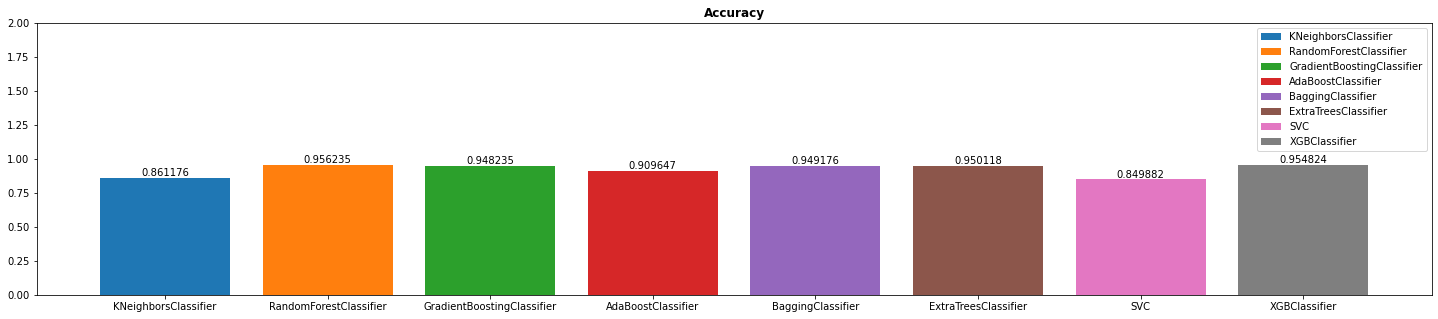

In [17]:
fig, axs = plt.subplots(figsize=(25, 5))
for i in dict_ensemble_methods_acc:
    plt.bar(i, dict_ensemble_methods_acc[i], label=i)
for bars in axs.containers:
    axs.bar_label(bars)
plt.legend(loc='upper right')
axs.set_ylim([0, 2])
plt.title('Accuracy', fontweight="bold")
plt.show()

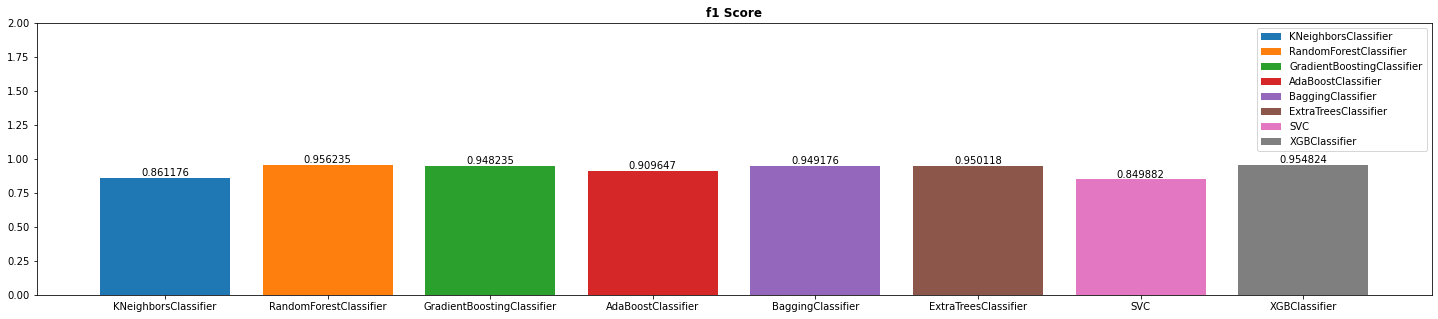

In [18]:
fig, axs = plt.subplots(figsize=(25, 5))
for i in dict_ensemble_methods_f1:
    plt.bar(i, dict_ensemble_methods_f1[i], label=i)
for bars in axs.containers:
    axs.bar_label(bars)
plt.legend(loc='upper right')
axs.set_ylim([0, 2])
plt.title('f1 Score', fontweight="bold")
plt.show()

In [19]:
best_model=dict((v, k) for k, v in dict_ensemble_methods_acc.items()).get(max(dict_ensemble_methods_acc.values()))
best_model

'RandomForestClassifier'

In [20]:
df = pd.read_csv('test (2).csv')

In [21]:
df.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [22]:
df['international_plan'].replace({'no': 0, 'yes': 1}, inplace=True)
df['voice_mail_plan'].replace({'no': 0, 'yes': 1}, inplace=True)

df.drop(columns=['state', 'area_code'], inplace=True)

df['minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['calls_cnt'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

df.drop(columns=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)
df.drop(columns=['total_day_calls', 'total_eve_calls', 'total_night_calls'], inplace=True)
df.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge'], inplace=True)

df.drop(columns=['total_intl_minutes', 'total_intl_calls'], inplace=True)

df.head()

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_charge,number_customer_service_calls,minutes,calls_cnt,total_charge
0,1,128,0,1,25,2.70,1,707.2,300,72.86
1,2,118,1,0,0,1.70,0,647.9,317,65.91
2,3,62,0,0,0,3.54,4,630.9,245,55.77
3,4,93,0,0,0,2.19,3,538.5,346,56.80
4,5,174,0,0,0,4.19,3,652.1,303,55.96


In [30]:
X = df.drop("id", axis=1)
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_charge,number_customer_service_calls,minutes,calls_cnt,total_charge
0,128,0,1,25,2.70,1,707.2,300,72.86
1,118,1,0,0,1.70,0,647.9,317,65.91
2,62,0,0,0,3.54,4,630.9,245,55.77
3,93,0,0,0,2.19,3,538.5,346,56.80
4,174,0,0,0,4.19,3,652.1,303,55.96


In [31]:
res=dict_ensemble_methods_model[best_model].predict(X)
res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
res_df=pd.DataFrame()

In [34]:
res_df['id']=df["id"]
res_df['churn']=list(res)
res_df['churn'].replace({0: 'no', 1: 'yes'}, inplace=True)
res_df.head()

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no
